<a href="https://colab.research.google.com/github/AidaCPL/infoVis_Week2/blob/main/Forum_Post_W2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pat I The Paper, Data, and Code

- **Paper**: https://www.nature.com/articles/s41560-023-01260-5#data-availability
- **Data**: https://zenodo.org/records/7782052

- **Code**: https://github.com/oruhnau/gas_savings


### Brief Description and Key Contributions of the Paper

**Title**: Natural gas savings in Germany during the 2022 energy crisis  
**Authors**: Oliver Ruhnau, Clemens Stiewe, Jarusch Muessel, Lion Hirth  
**Journal**: Nature Energy, Volume 8, June 2023

#### Brief Description:
This paper investigates how German consumers responded to the natural gas crisis of 2022, triggered by Russia’s reduced gas supply and exacerbated by the geopolitical tensions following the invasion of Ukraine. The study employs a multiple regression model to estimate gas savings across different consumer groups—small consumers (households), industry, and power stations—while accounting for temperature, seasonality, and trends.

#### Key Contributions:
1. **Empirical Estimation of Gas Savings**:
   - The paper quantitatively assesses the crisis response in natural gas consumption for distinct consumer categories.
   - It highlights significant reductions in gas usage, particularly a 23% reduction from the temperature-adjusted baseline in the second half of 2022.

2. **Consumer Behavior Analysis**:
   - The study reveals differences in the timing and magnitude of gas savings across sectors. For example, industrial users started saving earlier (September 2021) compared to small consumers (March 2022).
   - It discusses various drivers behind the savings, such as price increases, ethical considerations, and public attention.

3. **Methodological Advances**:
   - The authors utilize a robust econometric model to isolate the crisis effect on gas consumption, distinguishing it from regular temperature-driven variations.
   - They provide open-source code and data for reproducibility, enhancing the transparency and applicability of their research.

4. **Policy Implications**:
   - The findings suggest that exposing consumers to real prices is an effective mechanism for reducing consumption during crises.
   - It warns against price dilution through subsidies, emphasizing the need for policies that balance consumer support with sustained incentives for gas savings.

This paper provides critical insights into energy consumption behavior during crises and offers valuable guidance for policymakers to manage energy security challenges effectively.


# Part II: Reproduce The Targetted Figure for Redesign
Prompt Engineering

Original Figure

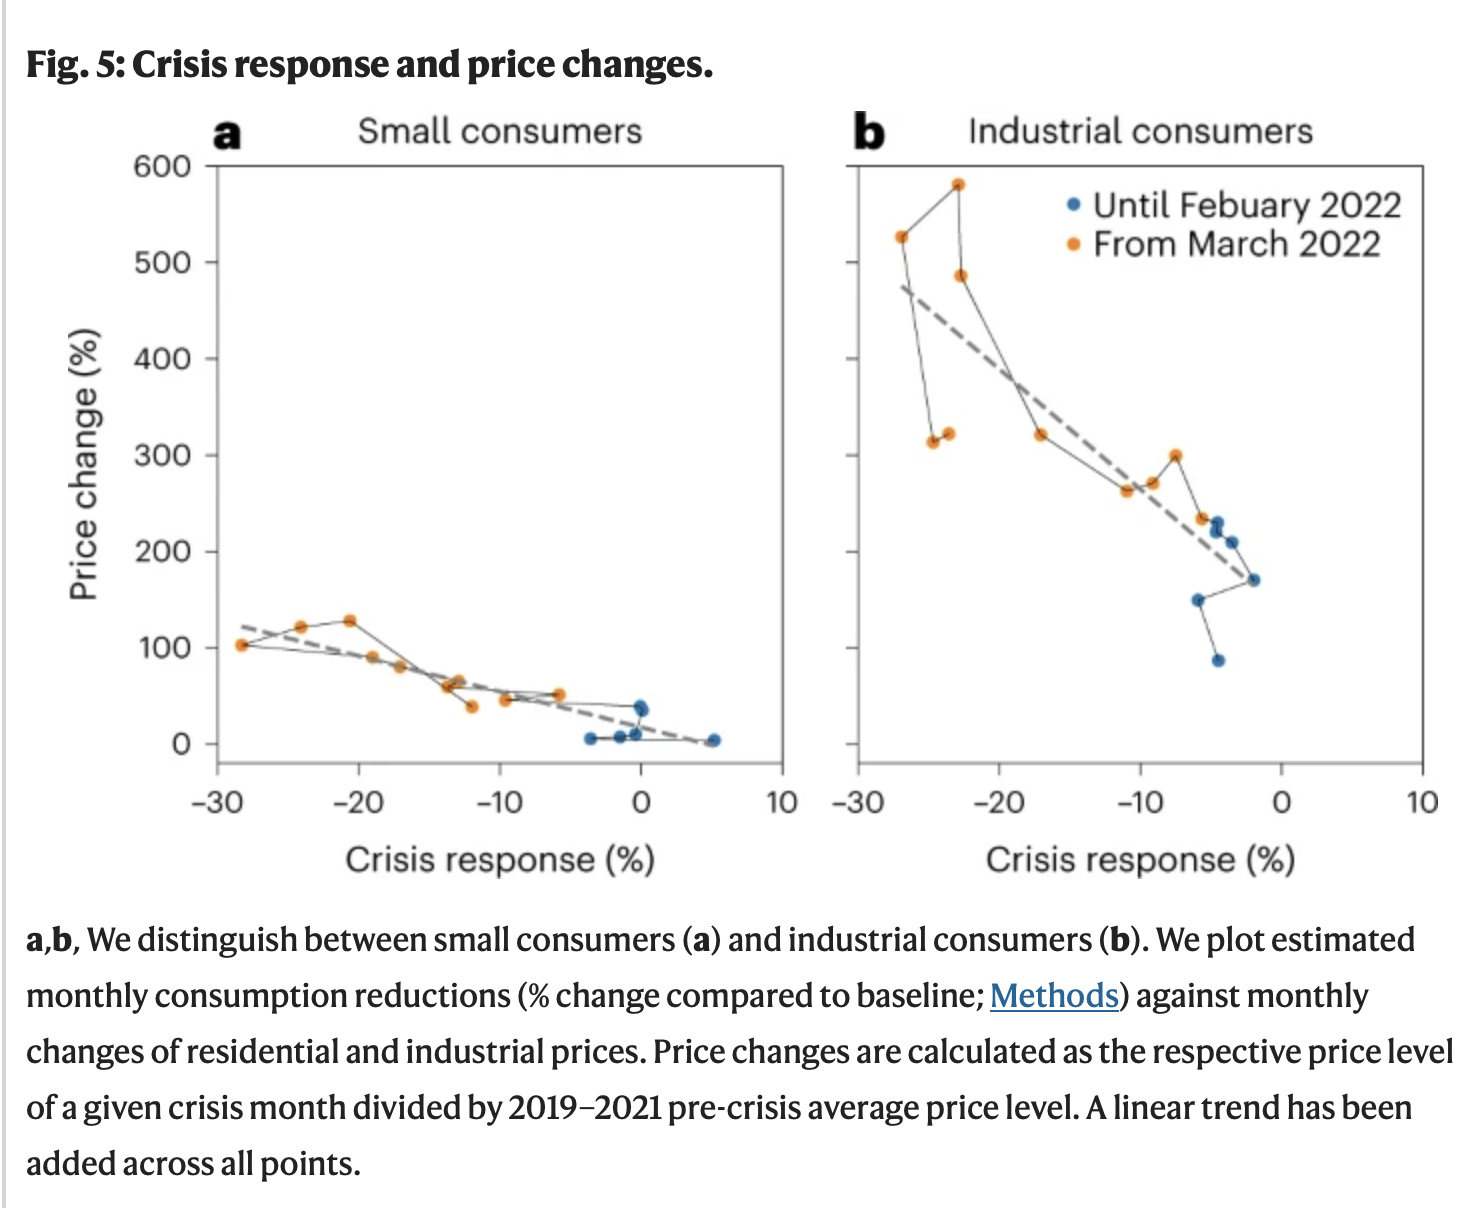

In [ ]:
# Load the real dataset
df_real = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/INFOSCI 301/preprocessed.csv', parse_dates=True, index_col=0)

# Displaying the first few rows to understand its structure
df_real.head()


,slp,industry,gas_to_electricity_public,aggregated,manufacturing_sector,hospitality_sector,retail_sector,real_wages,price_industry,price_households,...,year,month,weekday,weekday_num,monday,friday,weekend,christmas_period,holiday,long_weekend
2017-01-01,NaN,1.384165,0.289278,2.346911,94.1,82.6,96.1,NaN,NaN,NaN,...,2017,1,Sunday,6,0,0,1,0,1,0
2017-01-02,NaN,1.567748,0.488296,2.351308,94.1,82.6,96.1,NaN,NaN,NaN,...,2017,1,Monday,0,1,0,0,0,0,0
2017-01-03,NaN,1.627251,0.402844,2.239905,94.1,82.6,96.1,NaN,NaN,NaN,...,2017,1,Tuesday,1,0,0,0,0,0,0
2017-01-04,NaN,1.695429,0.413331,2.128920,94.1,82.6,96.1,NaN,NaN,NaN,...,2017,1,Wednesday,2,0,0,0,0,0,0
2017-01-05,NaN,1.679982,0.678022,2.384373,94.1,82.6,96.1,NaN,NaN,NaN,...,2017,1,Thursday,3,0,0,0,0,0,0


<ipython-input-14-c51e472b8913>:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_real_monthly = df_real.select_dtypes(include='number').resample('M').mean()


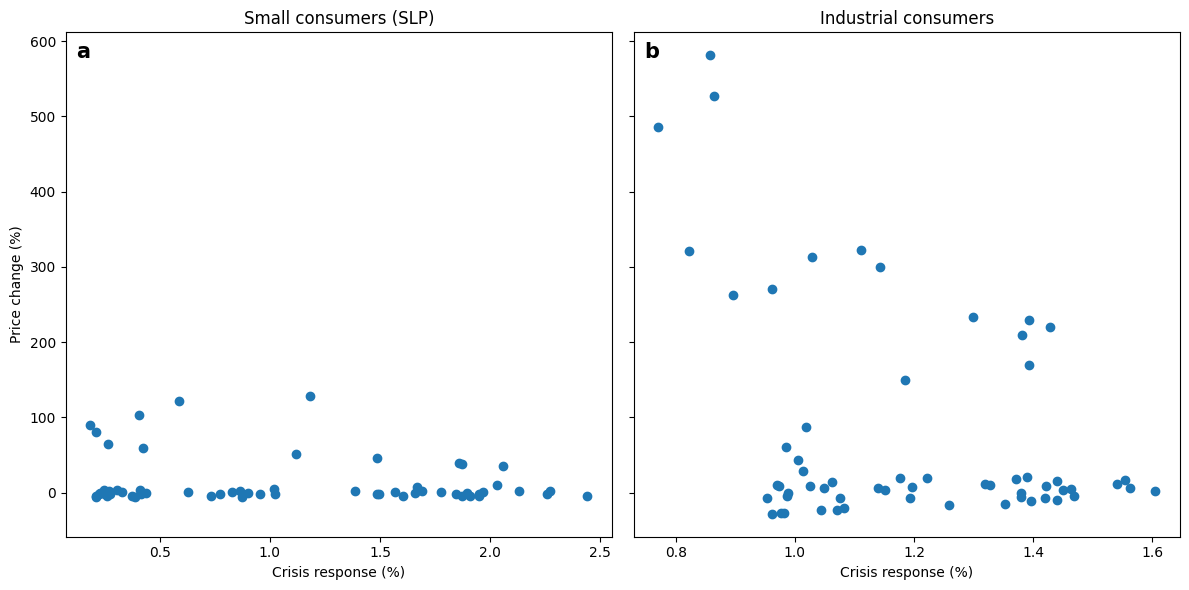

In [ ]:
# Define the cutoff date for the pre-crisis period
pre_crisis_cutoff = '2021-09-01'
start_year = 2019

# Calculate the pre-crisis average prices
price_households_precrisis = df_real['price_households'][
    (df_real.index < pre_crisis_cutoff) & (df_real.index.year >= start_year)
].mean()

price_industry_precrisis = df_real['price_industry'][
    (df_real.index < pre_crisis_cutoff) & (df_real.index.year >= start_year)
].mean()

# Preparing the data for plotting, ensuring only numeric columns are resampled
df_real_monthly = df_real.select_dtypes(include='number').resample('M').mean()

# Reusing pre-crisis averages from the earlier computation
df_real_monthly['price_households_change'] = (df_real_monthly['price_households'] / price_households_precrisis - 1) * 100
df_real_monthly['price_industry_change'] = (df_real_monthly['price_industry'] / price_industry_precrisis - 1) * 100

# Extracting the crisis response (assuming it's the relative consumption change)
df_real_monthly['crisis_response_slp'] = df_real_monthly['slp']
df_real_monthly['crisis_response_industry'] = df_real_monthly['industry']

# Creating the plot
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Small consumers (Households)
axs[0].scatter(df_real_monthly['crisis_response_slp'], df_real_monthly['price_households_change'])
axs[0].set_title('Small consumers (SLP)')
axs[0].set_xlabel('Crisis response (%)')
axs[0].set_ylabel('Price change (%)')

# Industrial consumers
axs[1].scatter(df_real_monthly['crisis_response_industry'], df_real_monthly['price_industry_change'])
axs[1].set_title('Industrial consumers')
axs[1].set_xlabel('Crisis response (%)')

# Adding abc labels
for i, ax in enumerate(axs):
    ax.text(0.02, 0.98, abc[i], transform=ax.transAxes, fontsize=15, verticalalignment='top', fontweight="bold")

plt.tight_layout()
plt.show()


Even after feeding the dataset and the code to Chat GPT Data Analyst GPT, it was not able to exactly replicate the figure. It is most likely because of the extensive preprocessing and data cleaning the authors of the paper performed on the data to then model the figures. Yet, I'll use this redesign and the original from the paper to evaluate based on the 4-levels of design.

# Part III: Evaluation Based on 4-Levels of Design by ChatGPT with Prompt Engineering Techniques

### Evaluation Based on 4-Levels of Design for Figure: Crisis Response and Price Changes

#### 1. Domain Situation

**Current Design Analysis:**
The scatter plot in the figure distinguishes between small and industrial consumers, showing the relationship between crisis response (% reduction in consumption) and price changes. While the graph effectively segments consumers before and after February 2022, the plot may pose challenges for users unfamiliar with interpreting scatter plots that combine percentage changes and trends over time.

**Suggested Improvement:**
To enhance accessibility, consider adding interactive features such as tooltips that provide exact values and contextual explanations for each data point. Highlighting critical periods (e.g., major price hikes or policy changes) with annotations can also help users quickly grasp the underlying trends and key events impacting consumption and prices.

#### 2. Data/Task Abstraction

**Current Design Analysis:**
The current design focuses on illustrating the correlation between consumption reduction and price changes, which serves well for comparing the response of small vs. industrial consumers. However, the visualization lacks clarity for users aiming to understand the temporal progression of crisis response within each category or the causality between events.

**Suggested Improvement:**
Incorporating time series elements into the scatter plot could clarify trends over time. Additionally, using dual-axis plots might help display temporal changes in a more digestible format, emphasizing the evolution of responses alongside price variations.

#### 3. Visual Encoding/Interaction Idiom and Algorithm

**Current Design Analysis:**
The figure uses color and shape encoding effectively to differentiate between consumer types and time periods. However, the dense clustering of points, particularly for industrial consumers, may make it challenging to discern individual data points and their corresponding trends.

**Suggested Improvement:**
Simplifying the visual encoding by reducing overlap through jittering or clustering techniques could improve readability. Introducing interactive filtering options to isolate specific periods or consumer groups could also help users focus on particular insights without visual clutter.

#### 4. Qualitative and Quantitative Analysis

**Current Design Analysis:**
There is no indication that this visualization has undergone extensive user testing. The current design may overwhelm users due to the dense presentation of data points and the lack of immediate interpretive guidance, such as a legend or contextual notes.

**Suggested Improvement:**
Conducting user testing with different target audiences (e.g., policymakers, analysts) would provide valuable feedback on the plot’s readability and usability. Measuring task completion times, such as identifying peak price responses or correlating specific points to external events, would offer quantitative insights into the plot’s effectiveness.

### Proposed Redesign

To improve clarity and user experience:
- **Add interactive elements** such as hover-over tooltips and filters for detailed exploration.
- **Simplify visual encoding** by minimizing overlap and clustering dense areas.
- **Incorporate annotations** to highlight significant events or trends.
- **Introduce a temporal axis** for users to better understand the progression of price changes and crisis responses over time.

These enhancements aim to create a more intuitive and insightful visualization that better serves its analytical purposes.

In [ ]:
import plotly.subplots as sp
import plotly.graph_objects as go

# Resetting index for Plotly compatibility
df_real_monthly.reset_index(inplace=True)

# Define the split date
split_date = pd.to_datetime('2022-03-01')

# Create subplots for interactive plotting
fig = sp.make_subplots(rows=1, cols=2, shared_yaxes=True,
                       subplot_titles=("Small consumers (SLP)", "Industrial consumers"),
                       horizontal_spacing=0.1)

# Add Small Consumers plot
fig.add_trace(go.Scatter(
    x=df_real_monthly['crisis_response_slp'],
    y=df_real_monthly['price_households_change'],
    mode='markers',
    marker=dict(color='blue', size=8, opacity=0.6),
    name='Small Consumers',
    text=df_real_monthly['index'].dt.strftime('%B %Y'),  # Tooltip for dates
    hovertemplate='<b>Date:</b> %{text}<br>' +
                  '<b>Crisis response:</b> %{x:.2f}%<br>' +
                  '<b>Price change:</b> %{y:.2f}%'
), row=1, col=1)

# Add Industrial Consumers plot
fig.add_trace(go.Scatter(
    x=df_real_monthly['crisis_response_industry'],
    y=df_real_monthly['price_industry_change'],
    mode='markers',
    marker=dict(color='orange', size=8, opacity=0.6),
    name='Industrial Consumers',
    text=df_real_monthly['index'].dt.strftime('%B %Y'),  # Tooltip for dates
    hovertemplate='<b>Date:</b> %{text}<br>' +
                  '<b>Crisis response:</b> %{x:.2f}%<br>' +
                  '<b>Price change:</b> %{y:.2f}%'
), row=1, col=2)

# Update layout for titles and axis labels
fig.update_layout(
    title_text="Crisis Response and Price Change Over Time",
    xaxis_title="Crisis response (%)",
    yaxis_title="Price change (%)",
    xaxis2_title="Crisis response (%)",
    showlegend=False,
    hovermode="closest",
    annotations=[
        dict(text="a", xref="paper", yref="paper", x=0.1, y=1.05, showarrow=False, font=dict(size=15)),
        dict(text="b", xref="paper", yref="paper", x=0.9, y=1.05, showarrow=False, font=dict(size=15))
    ]
)

# Display the interactive plot
fig.show()

### Summary: Improvements of the Redesign over the Original Visualization

The redesigned visualization introduces several enhancements to improve user interaction, readability, and the clarity of insights compared to the original static scatter plots.

#### 1. **Interactive Features**:
   - **Dynamic Tooltips**: The redesign incorporates tooltips that display detailed information (date, crisis response, and price change) when users hover over data points. This interactive feature allows users to explore the data more deeply without cluttering the visual with additional static annotations.
   - **Hover Templates**: Customized hover templates provide immediate context for each point, enhancing the user's ability to interpret specific data values accurately.

#### 2. **Split Subplots for Clear Comparison**:
   - The visualization separates **Small Consumers (SLP)** and **Industrial Consumers** into two adjacent subplots. This side-by-side layout allows users to directly compare the crisis response and price change patterns between the two consumer groups without overlapping data points.
   - By sharing the y-axis (price change), users can easily discern differences in price responses across the consumer types.

#### 3. **Enhanced Readability**:
   - **Color Coding**: Distinct colors (blue for small consumers and orange for industrial consumers) improve the differentiation between the groups. The opacity and size adjustments of the markers reduce visual clutter and enhance the focus on individual data points.
   - **Annotations**: Labels ‘a’ and ‘b’ above the plots provide clear, succinct titles that help users quickly identify the subplots.

#### 4. **Improved Temporal Context**:
   - **Tooltip with Date Information**: By showing the specific month and year for each data point, the plot provides temporal context, helping users understand how the crisis response and price changes evolved over time.
   - This is particularly useful in understanding the impact of external events (like policy changes or seasonal variations) on consumer behavior.

#### 5. **User-Centric Design**:
   - The interactive nature of the plot makes it easier for users to explore specific aspects of the data at their own pace, enhancing engagement and allowing for personalized insights.
   - The reduced cognitive load due to clear segmentation and interactive exploration supports better comprehension, especially for users analyzing complex data trends.

### Conclusion:
The redesigned interactive plot offers significant improvements in terms of user engagement, accessibility, and detailed data exploration. However, the original static plot has its own strengths in simplicity and ease of reproducibility. The interactive redesign enhances the user's ability to interact with and extract insights from the data but may pose challenges in terms of reproducibility due to the need for comprehensive preprocessing and interactive plotting expertise.
